# 1️⃣ Blok 1: Import Library & Setup

In [11]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Setup visualisasi agar grafik terlihat rapi
sns.set(style="whitegrid")

# Fungsi untuk mengevaluasi model (akan dipanggil nanti)
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- Evaluasi {name} ---")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")
    return {'MAE': mae, 'MSE': mse, 'R2': r2}

print("✅ Library berhasil di-load!")

✅ Library berhasil di-load!


# 2️⃣ Blok 2: Load Dataset

In [12]:
# Mendefinisikan nama kolom (karena file asli tidak punya header)
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model_year', 'origin', 'car_name']

# Membaca dataset
# delim_whitespace=True digunakan karena pemisah antar data adalah spasi
try:
    df = pd.read_csv('auto-mpg.data', names=cols, delim_whitespace=True)
    print("✅ Dataset berhasil dibaca!")
    print("\n--- 5 Baris Pertama Data ---")
    display(df.head())
except FileNotFoundError:
    print("❌ Error: File 'auto-mpg.data' tidak ditemukan. Harap upload file dulu di menu sebelah kiri.")

✅ Dataset berhasil dibaca!

--- 5 Baris Pertama Data ---


/tmp/ipython-input-2860392602.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', names=cols, delim_whitespace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 3️⃣ Blok 3: Data Cleaning & Preprocessing

In [13]:
# 1. Menangani nilai '?' pada kolom horsepower
print("Membersihkan data...")
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)

# 2. Mengisi nilai kosong (NaN) dengan Median
median_hp = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(median_hp) # Menggunakan assignment langsung untuk menghindari warning

# 3. Menghapus kolom 'car_name' (tidak dipakai prediksi)
df_clean = df.drop(columns=['car_name'])

# 4. Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop(columns=['mpg'])
y = df_clean['mpg']

# 5. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scaling (Penting untuk Deep Learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Preparation selesai!")
print(f"Dimensi Training: {X_train.shape}")
print(f"Dimensi Testing: {X_test.shape}")

Membersihkan data...
✅ Data Preparation selesai!
Dimensi Training: (318, 7)
Dimensi Testing: (80, 7)


# 4️⃣ Blok 4: Baseline Model

In [14]:
# Dictionary untuk menyimpan hasil semua model
results = {}

# Membuat Baseline Model (Dummy Regressor - Mean)
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

# Prediksi & Evaluasi
y_pred_base = baseline.predict(X_test)
results['Baseline'] = evaluate_model('Baseline Model', y_test, y_pred_base)

--- Evaluasi Baseline Model ---
MAE: 5.9554
MSE: 53.9833
R2 Score: -0.0040



# 5️⃣ Blok 5: Machine Learning (Random Forest)

In [15]:
# Membuat model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi & Evaluasi
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = evaluate_model('Random Forest', y_test, y_pred_rf)

--- Evaluasi Random Forest ---
MAE: 1.5773
MSE: 4.5843
R2 Score: 0.9147



# 6️⃣ Blok 6: Deep Learning (Neural Network)

In [16]:
# Set seed agar hasil konsisten
tf.random.set_seed(42)

# Membuat arsitektur Neural Network
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Layer 1
    Dropout(0.2),                                                         # Mencegah overfitting
    Dense(32, activation='relu'),                                         # Layer 2
    Dense(1)                                                              # Output Layer
])

# Compile Model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training Model (Epochs=100)
print("Sedang melatih Neural Network...")
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0 # Ubah ke 1 jika ingin melihat log berjalan per baris
)

# Prediksi & Evaluasi
y_pred_dl = dl_model.predict(X_test_scaled).flatten()
print("\n")
results['Deep Learning'] = evaluate_model('Deep Learning', y_test, y_pred_dl)

Sedang melatih Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


--- Evaluasi Deep Learning ---
MAE: 1.9249
MSE: 6.3287
R2 Score: 0.8823



# 7️⃣ Blok 7: Visualisasi & Perbandingan Akhir

=== TABEL PERBANDINGAN PERFORMA ===


,MAE,MSE,R2
Baseline,5.955409,53.983298,-0.004033
Random Forest,1.577338,4.584260,0.914738
Deep Learning,1.924939,6.328656,0.882294


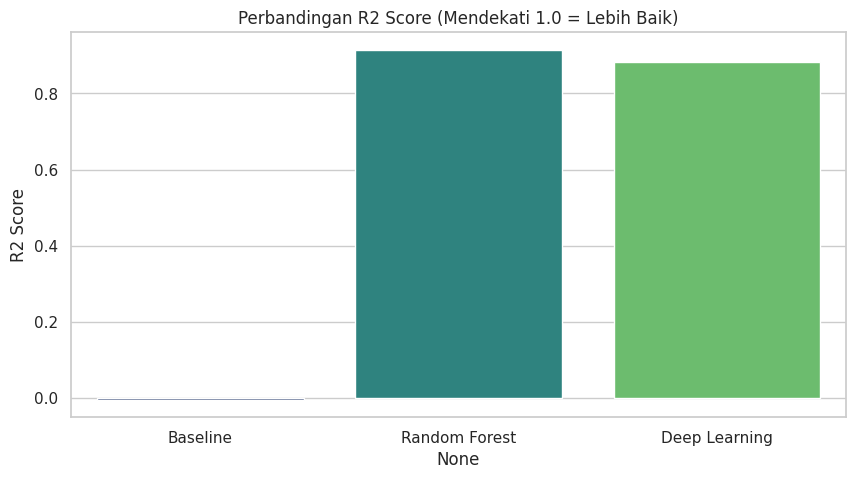

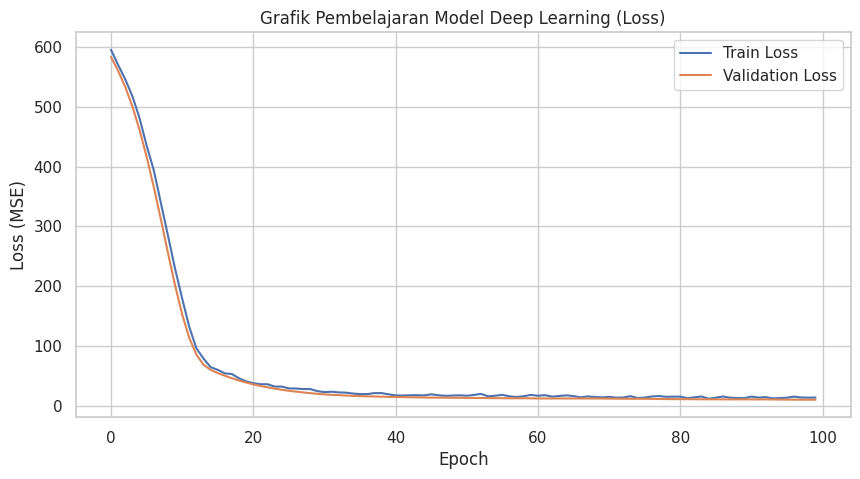

In [17]:
# Membuat DataFrame perbandingan
res_df = pd.DataFrame(results).T

print("=== TABEL PERBANDINGAN PERFORMA ===")
display(res_df)

# 1. Plot Bar Chart R2 Score
plt.figure(figsize=(10, 5))
sns.barplot(x=res_df.index, y=res_df['R2'], palette="viridis", hue=res_df.index, legend=False)
plt.title("Perbandingan R2 Score (Mendekati 1.0 = Lebih Baik)")
plt.ylabel("R2 Score")
plt.show()

# 2. Plot Loss History (Deep Learning)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Grafik Pembelajaran Model Deep Learning (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()